In [1]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'Alzheimer_s Dataset/train'
test_path = 'Alzheimer_s Dataset/test'

In [5]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 5121 images belonging to 4 classes.


# **MobileNet**

In [7]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
x1= Flatten()(mob.output)
prediction1 = Dense(4, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [9]:
r1 = model12.fit(train_set, validation_data=test_set, epochs=5, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/5
161/161 [==============================] - 1378s 9s/step - loss: 2.7014 - accuracy: 0.5454 - val_loss: 25.0190 - val_accuracy: 0.3499
Epoch 2/5
161/161 [==============================] - 1667s 10s/step - loss: 0.6861 - accuracy: 0.6971 - val_loss: 1.1827 - val_accuracy: 0.6464
Epoch 3/5
161/161 [==============================] - 1936s 12s/step - loss: 0.4749 - accuracy: 0.8127 - val_loss: 0.9806 - val_accuracy: 0.7518
Epoch 4/5
161/161 [==============================] - 1876s 12s/step - loss: 0.3077 - accuracy: 0.8828 - val_loss: 0.4914 - val_accuracy: 0.8492
Epoch 5/5
161/161 [==============================] - 1674s 10s/step - loss: 0.2399 - accuracy: 0.9090 - val_loss: 0.1976 - val_accuracy: 0.9484


In [12]:
model12.save('model.h5')

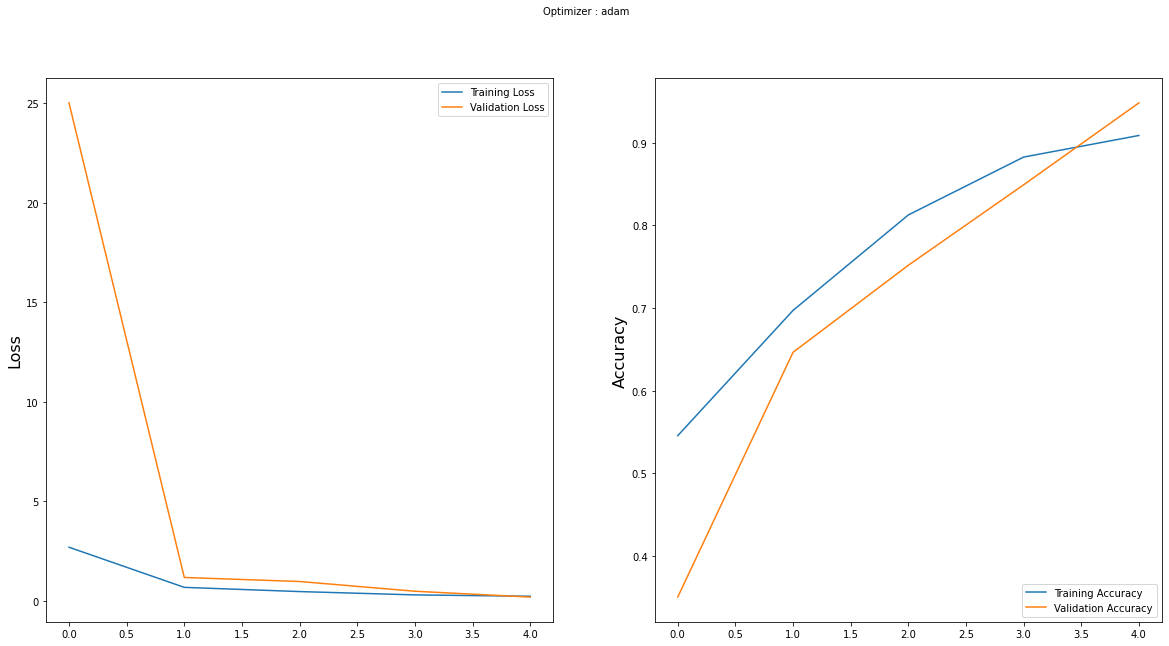

In [13]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# PACNet Based Inception ResNet V2

In [14]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [15]:
x3 = Flatten()(inc.output)
predictionss = Dense(4, activation='softmax')(x3)

In [16]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

conv2d_152 (Conv2D)             (None, 12, 12, 192)  208896      block17_19_ac[0][0]              
__________________________________________________________________________________________________
conv2d_155 (Conv2D)             (None, 12, 12, 192)  215040      activation_154[0][0]             
__________________________________________________________________________________________________
batch_normalization_152 (BatchN (None, 12, 12, 192)  576         conv2d_152[0][0]                 
__________________________________________________________________________________________________
batch_normalization_155 (BatchN (None, 12, 12, 192)  576         conv2d_155[0][0]                 
__________________________________________________________________________________________________
activation_152 (Activation)     (None, 12, 12, 192)  0           batch_normalization_152[0][0]    
__________________________________________________________________________________________________
activation

In [17]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/20
161/161 [==============================] - 3866s 24s/step - loss: 1.4826 - accuracy: 0.5474 - val_loss: 622338.2500 - val_accuracy: 0.4999
Epoch 2/20
161/161 [==============================] - 2643s 16s/step - loss: 1.4491 - accuracy: 0.5352 - val_loss: 2375.5447 - val_accuracy: 0.1400
Epoch 3/20
161/161 [==============================] - 2590s 16s/step - loss: 1.0294 - accuracy: 0.5882 - val_loss: 25812.1230 - val_accuracy: 0.3499
Epoch 4/20
161/161 [==============================] - 2600s 16s/step - loss: 0.8433 - accuracy: 0.6372 - val_loss: 1.0137 - val_accuracy: 0.5165
Epoch 5/20
161/161 [==============================] - 2613s 16s/step - loss: 0.7552 - accuracy: 0.7128 - val_loss: 0.4926 - val_accuracy: 0.8002
Epoch 6/20
161/161 [==============================] - 2620s 16s/step - loss: 1.0132 - accuracy: 0.6626 - val_loss: 980123.2500 - val_accuracy: 0.3499
Epoch 7/20
161/161 [==============================] - 2616s 16s/step - loss: 1.2722 - accuracy: 0.5681 - val_loss

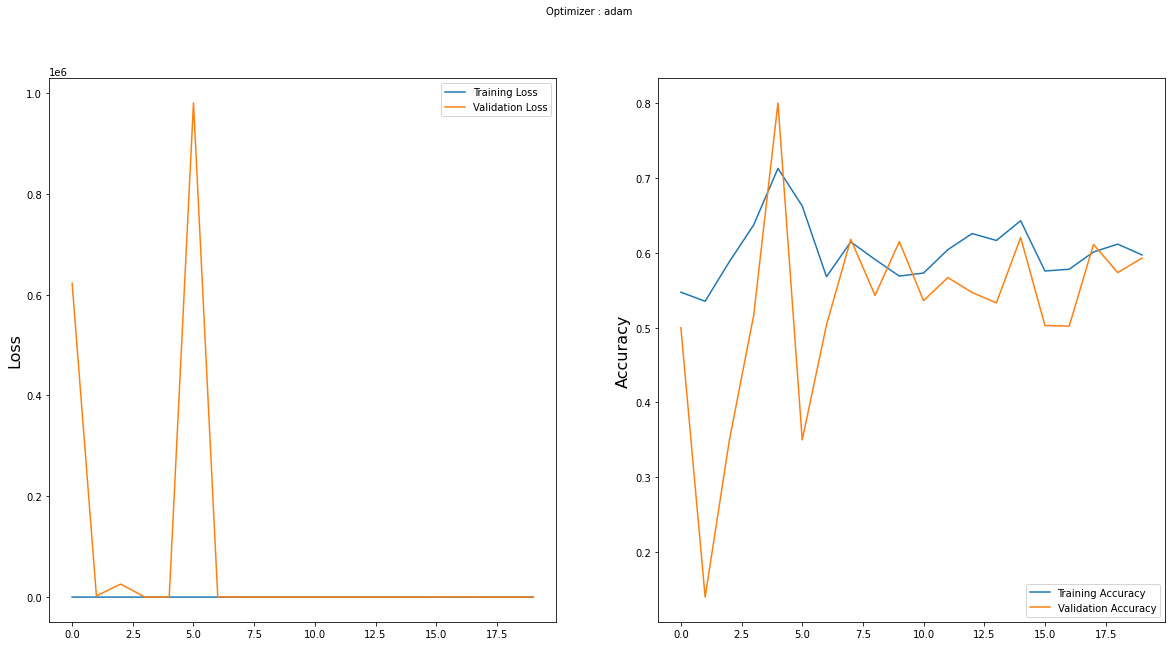

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# NMF-TDNet

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [20]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(4,kernel_regularizer=l2(0.01),activation = "linear"))
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

In [21]:
history1 = model.fit(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
161/161 [==============================] - 72s 448ms/step - loss: 0.6751 - accuracy: 0.4978 - val_loss: 0.5956 - val_accuracy: 0.5577
Epoch 2/20
161/161 [==============================] - 71s 443ms/step - loss: 0.5617 - accuracy: 0.5622 - val_loss: 0.5306 - val_accuracy: 0.5792
Epoch 3/20
161/161 [==============================] - 72s 445ms/step - loss: 0.5132 - accuracy: 0.6055 - val_loss: 0.4742 - val_accuracy: 0.6495
Epoch 4/20
161/161 [==============================] - 72s 445ms/step - loss: 0.4760 - accuracy: 0.6497 - val_loss: 0.4584 - val_accuracy: 0.6729
Epoch 5/20
161/161 [==============================] - 72s 445ms/step - loss: 0.4364 - accuracy: 0.6846 - val_loss: 0.3672 - val_accuracy: 0.7606
Epoch 6/20
161/161 [==============================] - 72s 445ms/step - loss: 0.3968 - accuracy: 0.7223 - val_loss: 0.3125 - val_accuracy: 0.8147
Epoch 7/20
161/161 [==============================] - 72s 446ms/step - loss: 0.3709 - accuracy: 0.7477 - val_loss: 0.3226 - val_ac

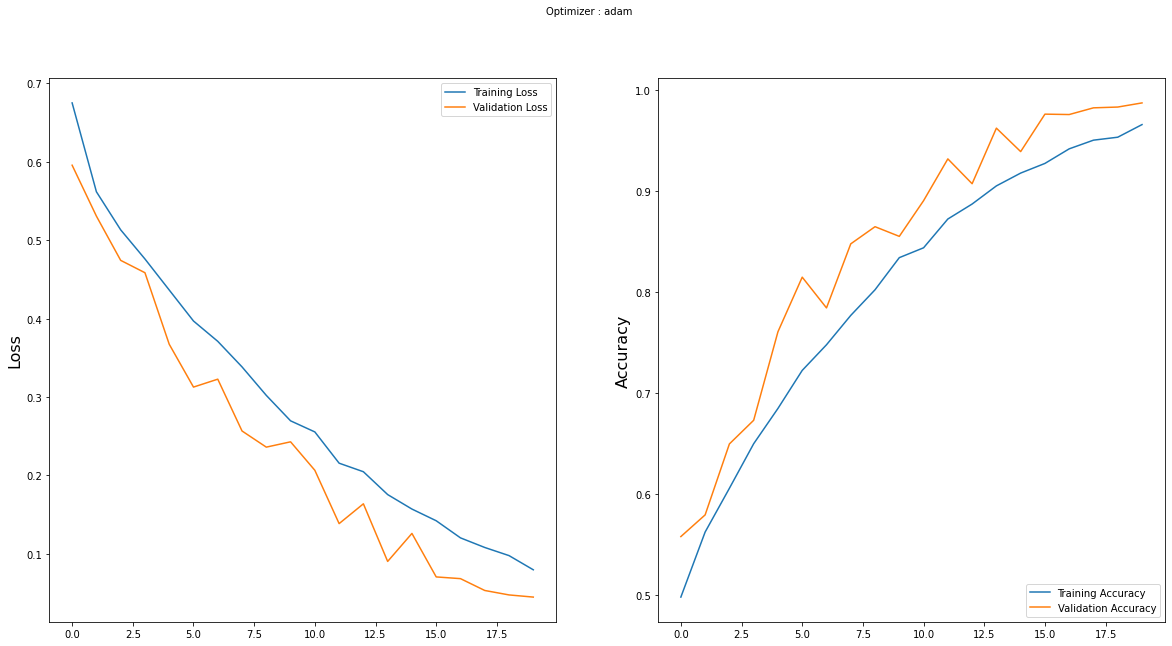

In [22]:
import matplotlib.pyplot as plt

x=history1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Feature Extraction for ML

In [1]:
import sys
import shutil
from glob import glob
import json
import math
import os
import cv2
import glob as gb
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import densenet
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

Using TensorFlow backend.


In [2]:
code = {'MildDemented':0 ,'ModerateDemented':1,'NonDemented':2 ,'VeryMildDemented':3}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [3]:
#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the train images set
trainpath='Alzheimer_s Dataset/train/'

X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (32,32))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [5]:
#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the train images set
testpath= 'Alzheimer_s Dataset/test/'

X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (32,32))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [6]:
loaded_X_train = np.load('X_train.npy')
loaded_X_test = np.load('X_test.npy')
loaded_y_train = np.load('y_train.npy')
loaded_y_test = np.load('y_test.npy')

In [7]:
X_train = loaded_X_train.reshape([-1, np.product((32,32,3))])
X_test = loaded_X_test.reshape([-1, np.product((32,32,3))])

In [8]:
y_train = loaded_y_train
y_test = loaded_y_test

In [9]:
#shuffle train and test data sets in a consistent way

from sklearn.utils import shuffle as shf
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [1]:
#making an instance of each algorithm
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
y_pred_svm =svm_clf.predict(X_test)

NameError: name 'X_train' is not defined

In [12]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[  3,   0,  95,  81],
       [  0,   0,   6,   6],
       [  0,   0, 575,  65],
       [  0,   0, 288, 160]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.5770132916340891


# Support Vector Regression

In [14]:
from sklearn.svm import SVR
clf1 = SVR(C=1.0, epsilon=0.2)
clf1.fit(X_train, y_train)

SVR(epsilon=0.2)

In [15]:
r2_score = clf1.score(X_test,y_test)
print(r2_score*100,'%')

-4.957557171386462 %


In [16]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
predictions = DT.predict(X_train)
val2 = (accuracy_score(y_train, predictions)*100)
print("*Accuracy score for DT: ", val2, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_train, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_train, predictions))

*Accuracy score for DT:  100.0 

*Confusion Matrix for DT: 
[[ 717    0    0    0]
 [   0   52    0    0]
 [   0    0 2560    0]
 [   0    0    0 1792]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       717
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00      2560
           3       1.00      1.00      1.00      1792

    accuracy                           1.00      5121
   macro avg       1.00      1.00      1.00      5121
weighted avg       1.00      1.00      1.00      5121



In [17]:
import pickle
pickle.dump(DT,open('model.pkl','wb'))